### Importing Neccessary Libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=pd.read_excel('monel (1).xlsx')

### Top Ten of the data

In [4]:
data.head()

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,1260688,10230.19,42.4,3,3,15,24,Male,No
1,3159700,18697.50,103.0,5,2,39,39,Female,Yes
2,3977101,18149.15,84.4,7,2,37,25,Male,No
3,16620929,8040.15,37.0,3,4,58,37,Female,No
4,6504217,9695.48,109.7,5,3,0,39,Female,No


### Data Cleaning

In [5]:
#No emppty data set
data.isnull().sum()

Account Number                              0
Annual Charges ($)                          0
Annual Income ($1000)                       0
Household Size                              0
Years of Post-High School Education         0
Hours Per Week Watching Television          0
Age                                         0
Gender                                      0
Exceeded Credit Limit in Past 12 Months?    0
dtype: int64

<AxesSubplot:>

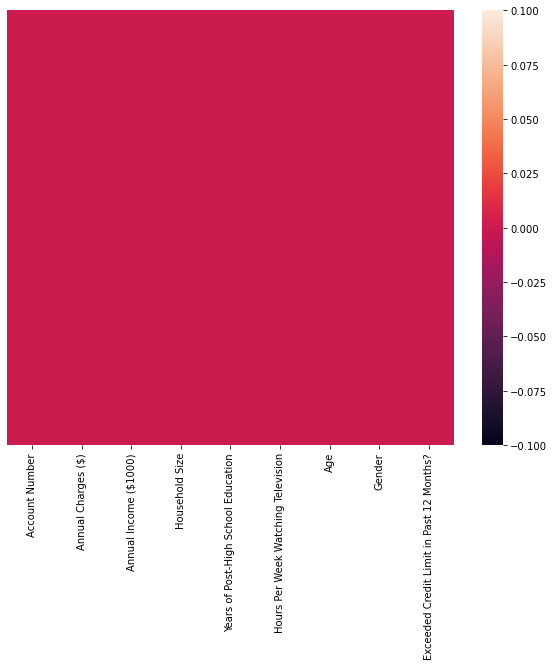

In [6]:
fig=py.figure(figsize=(10,8))
sns.heatmap(data.isnull(),yticklabels=False)

### Correlation Matrix

<AxesSubplot:>

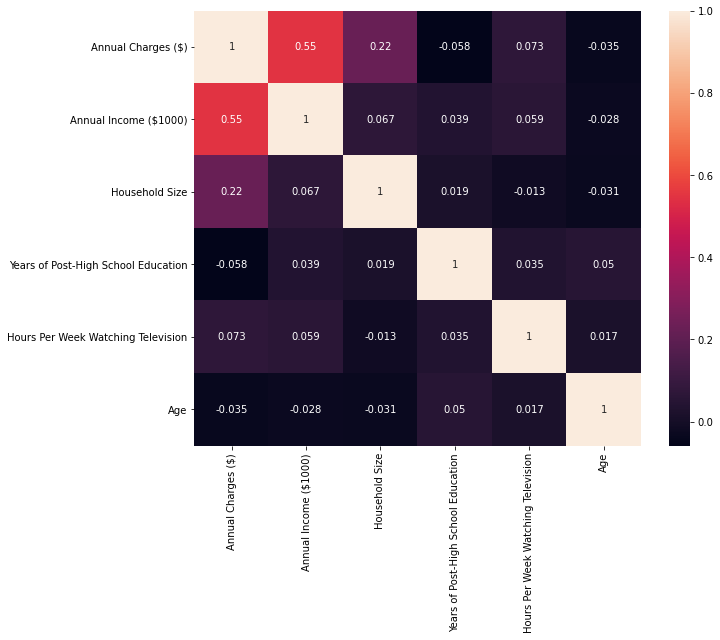

In [7]:

fig=py.figure(figsize=(10,8))
sns.heatmap(data[data.columns[1:]].corr(),annot=True)


In [16]:
correlation=data[data.columns[1:]].corr()['Annual Charges ($)'].sort_values(ascending=False)
(pd.DataFrame(correlation))

,Annual Charges ($)
Annual Charges ($),1.000000
Annual Income ($1000),0.548200
Household Size,0.223213
Hours Per Week Watching Television,0.072535
Age,-0.035161
Years of Post-High School Education,-0.058099


### Which independent variable(s) do you believe will help forecast the annual charges

###### Annual Income($1000) 
######  The resulting output shows the sorted correlation values,
######  The variables with higher absolute correlation values are more likely to help forecast the annual charges,
######  In other words, these variables have a stronger linear relationship with the
######  annual charges and are potentially more influential in predicting the charges.




#### Create a simple linear regression model using the customer’s annual household income as the independent variable

In [17]:
data.columns

Index(['Account Number', 'Annual Charges ($)', 'Annual Income ($1000)',
       'Household Size', 'Years of Post-High School Education',
       'Hours Per Week Watching Television', 'Age', 'Gender',
       'Exceeded Credit Limit in Past 12 Months?'],
      dtype='object')

In [18]:
income=np.array(data['Annual Income ($1000)'])
charge=np.array(data['Annual Charges ($)'])

In [19]:
X=income.reshape(-1,1)
y=charge

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear=LinearRegression()
linear.fit(X,y)

LinearRegression()

In [21]:
#coefffcient 

In [22]:
slope=linear.coef_

print('Slope is ',slope[0])

Slope is  119.76625096552402


In [23]:
intercept=linear.intercept_
print(intercept)



2771.9333717682657


In [24]:
rsquared_income=linear.score(X,y)

In [25]:
rsquared_income

0.30052347162160453

In [28]:
import statsmodels.api as sm
import pandas as pd

In [29]:
a=income  #Independent variable (annual household income
b=charge  # Dependent variable
B=sm.add_constant(b)  # Add a constant term for the intercept
model=sm.OLS(a,b) # Ordinary Least Squares (OLS) regression
results = model.fit()  # Fit the model


In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                              1807.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                   6.87e-149
Time:                        20:06:21   Log-Likelihood:                         -1895.0
No. Observations:                 393   AIC:                                      3792.
Df Residuals:                     392   BIC:                                      3796.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0053      0.000     42.514      0.000       0.005       0.006
==============================================================================
Omnibus:                       14.555   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.990
Skew:                           0.047   Prob(JB):                       0.0303
Kurtosis:                       2.353   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
print(results.pvalues[0])
print(results.rsquared)

6.869620909364351e-149
0.8217756743897002


#### Estimated Slope Coefficient: 119.76625096552402

#### For a one-unit increase in annual household income, the estimated change in annual charges is 119.76625096552402 units.


### How much variation in credit card charges can be explained by this simple linear regression model?

In [32]:
r_squared=results.rsquared

In [33]:
print('r_squared is',r_squared)

r_squared is 0.8217756743897002


#### R-squared:  0.8217756743897002

#### Approximately  0.8217756743897002 of the variation in credit card charges can be explained by the annual household
#### income variable in the simple linear regression model.


##### Create a simple linear regression model using the number of members in customer’s household as
#####  the independent variable.

In [34]:
data.head()

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,1260688,10230.19,42.4,3,3,15,24,Male,No
1,3159700,18697.50,103.0,5,2,39,39,Female,Yes
2,3977101,18149.15,84.4,7,2,37,25,Male,No
3,16620929,8040.15,37.0,3,4,58,37,Female,No
4,6504217,9695.48,109.7,5,3,0,39,Female,No


In [35]:
household=np.array(data['Household Size'])
annual_charge=np.array(data['Annual Charges ($)'])

In [36]:
X=household.reshape(-1,1)
y=annual_charge

In [37]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [39]:
model.score(X,y)

0.04982383720611039

In [40]:
slope=model.coef_[0]
intercept=model.intercept_

print('Slope is ',slope)
print('Intercept is',intercept)

Slope is  653.1217844746739
Intercept is 7719.60963202251


In [41]:
r_squared_household=model.score(X,y)

In [42]:
r_squared_household

0.04982383720611039

##### the slope coefficient tells us how the dependent variable (annual charges) changes when the independent variable

#####  (number of members in the household) changes by one unit.

In [43]:
import statsmodels.api as sm
import pandas as pd
a=household  #Independent variable (annual household income
b=annual_charge  # Dependent variable
B=sm.add_constant(a)  # Add a constant term for the intercept
model=sm.OLS(b,a) # Ordinary Least Squares (OLS) regression
results = model.fit()  # Fit the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                              906.2
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                   5.67e-104
Time:                        20:06:31   Log-Likelihood:                         -4020.9
No. Observations:                 393   AIC:                                      8044.
Df Residuals:                     392   BIC:                                      8048.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2080.0231     69.098     30.103      0.000    1944.175    2215.872
==============================================================================
Omnibus:                        0.543   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.656
Skew:                          -0.028   Prob(JB):                        0.720
Kurtosis:                       2.808   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Create a simple linear regression model using the customer’s number of years of post-high school
#####  education as the independent variable.

In [44]:
data.head()

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,1260688,10230.19,42.4,3,3,15,24,Male,No
1,3159700,18697.50,103.0,5,2,39,39,Female,Yes
2,3977101,18149.15,84.4,7,2,37,25,Male,No
3,16620929,8040.15,37.0,3,4,58,37,Female,No
4,6504217,9695.48,109.7,5,3,0,39,Female,No


In [45]:
education=np.array(data['Years of Post-High School Education']).reshape(-1,1)
charges=np.array(data['Annual Charges ($)'])

In [46]:
X=education
y=charges

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear=LinearRegression()
linear.fit(X,y)

slope=linear.coef_[0]
intercept=linear.intercept_
print('slope is',slope)
print('Intercept',intercept)

slope is -234.53729574273262
Intercept 11260.378502799156


In [48]:
r_squared_education=linear.score(X,y)

In [49]:
r_squared_education

0.0033754472402595104

In [50]:
import statsmodels.api as sm
import pandas as pd
a=education  #Independent variable (annual household income
b=charges  # Dependent variable
B=sm.add_constant(a)  # Add a constant term for the intercept
model=sm.OLS(b,a) # Ordinary Least Squares (OLS) regression
results = model.fit()  # Fit the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.556
Method:                 Least Squares   F-statistic:                              492.5
Date:                Fri, 14 Jul 2023   Prob (F-statistic):                    2.90e-71
Time:                        20:06:35   Log-Likelihood:                         -4096.3
No. Observations:                 393   AIC:                                      8195.
Df Residuals:                     392   BIC:                                      8199.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2964.1244    133.566     22.192      0.000    2701.529    3226.719
==============================================================================
Omnibus:                        2.975   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.868
Skew:                           0.156   Prob(JB):                        0.238
Kurtosis:                       2.722   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
results.rsquared

0.5568095166360952

In [52]:
results.pvalues[0]

2.9041382059062878e-71

###### If the p-value is below the predetermined significance level (e.g., 0.05), 
#### you can conclude that the number of years of post-high school education variable is statistically significant. 
#### It indicates that the variable has a significant relationship with 
#### the dependent variable (credit card charges) in the regression model.

##### Create a multiple linear regression model using annual household income, the number of members
##### in the customer’s household, and the number of years of post-high school education as independent
##### variables

In [53]:
data.head()

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,1260688,10230.19,42.4,3,3,15,24,Male,No
1,3159700,18697.50,103.0,5,2,39,39,Female,Yes
2,3977101,18149.15,84.4,7,2,37,25,Male,No
3,16620929,8040.15,37.0,3,4,58,37,Female,No
4,6504217,9695.48,109.7,5,3,0,39,Female,No


In [54]:
cd=data[['Annual Income ($1000)','Household Size','Years of Post-High School Education',]]

In [55]:
cd.head()

,Annual Income ($1000),Household Size,Years of Post-High School Education
0,42.4,3,3
1,103.0,5,2
2,84.4,7,2
3,37.0,3,4
4,109.7,5,3


In [56]:
X=cd
y=data['Annual Charges ($)']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(X,y)

LinearRegression()

In [58]:
lin_model.coef_

array([ 117.71874793,  552.62336363, -333.22102017])

In [59]:
multiple_income_slope=lin_model.coef_[0]
multiple_householde_slope=lin_model.coef_[1]
multiple_education_slope=lin_model.coef_[2]



In [60]:
income_slope=119.76625096552402
household_slope= 722.2850690645337
education_slope=-234.53729574273262

In [61]:
print('Slope Income(Simple model)',income_slope)
print('Slope household(Simple model)',household_slope)
print('Slope education(Simple model)',education_slope)
print('\n')
print('Slope Income (Multiple)', multiple_income_slope)
print('Slope Household (Multiple)', multiple_householde_slope)
print('Slope education slope (Multiple)', multiple_education_slope)





Slope Income(Simple model) 119.76625096552402
Slope household(Simple model) 722.2850690645337
Slope education(Simple model) -234.53729574273262


Slope Income (Multiple) 117.71874792542987
Slope Household (Multiple) 552.6233636293871
Slope education slope (Multiple) -333.22102017284215


In [62]:
multiple_r_squared=lin_model.score(X,y)

In [63]:
multiple_r_squared

0.3423387194011349

##### b) What does this tell you about multicollinearity in the multiple regression model?

##### Multicollinearity refers to a situation where there is a high correlation between two
##### or more independent variables in a multiple regression model
##### high correlations (close to 1 or -1) between any pairs of independent variables, it suggests multicollinearity.

<AxesSubplot:>

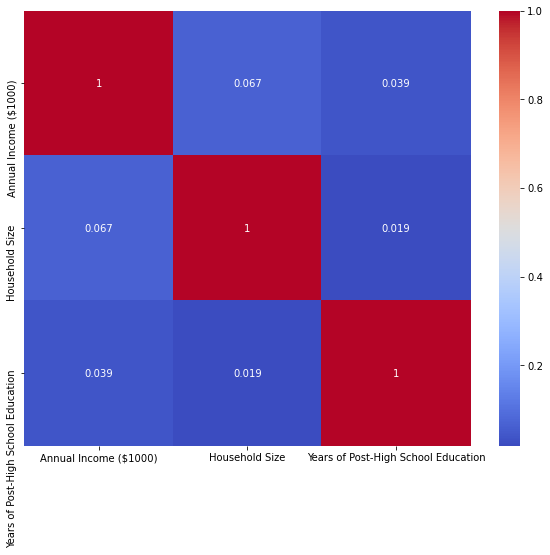

In [64]:
fig=py.figure(figsize=(10,8))
import seaborn as sns
sns.heatmap(cd.corr(), annot=True,cmap='coolwarm')

In [65]:
#Add the coefficients of determination from the 3 simple linear regression models together
#and compare the result to the coefficient of determination for the multiple regression model.

In [66]:
r_square_simple=rsquared_income + r_squared_household+r_squared_education
r_square_multiple=multiple_r_squared

In [67]:
print('rsquared simple',r_square_simple)
print('rquared multiple',multiple_r_squared)

rsquared simple 0.35372275606797443
rquared multiple 0.3423387194011349


###### If the combined R-squared value from the simple linear regression models is very close to or higher than
##### the R-squared value from the multiple regression model, it suggests that the individual independent variables in
##### the simple linear regression models are highly correlated with the dependent variable and 
##### do not have substantial collinearity with each other. 
##### In such cases, multicollinearity may not be a significant concern

#### ) 6 Add the variables ‘Gender’ and ‘Exceeded Credit Limit in Past 12 Months?’ to your multiple regression model

In [68]:
cd['Gender']=data['Gender']
cd['Exceeded Credit Limit in Past 12 Months?']=data['Exceeded Credit Limit in Past 12 Months?']

In [69]:
cd.head()

,Annual Income ($1000),Household Size,Years of Post-High School Education,Gender,Exceeded Credit Limit in Past 12 Months?
0,42.4,3,3,Male,No
1,103.0,5,2,Female,Yes
2,84.4,7,2,Male,No
3,37.0,3,4,Female,No
4,109.7,5,3,Female,No


In [70]:
def convert(gender):
    if gender=='Male':
        return 1
    else:
        return 0

In [71]:
cd['Gender']=cd['Gender'].apply(convert)

In [72]:
cd

,Annual Income ($1000),Household Size,Years of Post-High School Education,Gender,Exceeded Credit Limit in Past 12 Months?
0,42.4,3,3,1,No
1,103.0,5,2,0,Yes
2,84.4,7,2,1,No
3,37.0,3,4,0,No
4,109.7,5,3,0,No
...,...,...,...,...,...
388,70.3,5,4,0,No
389,15.4,7,1,1,No
390,31.4,7,3,0,No
391,73.8,5,0,1,No


In [73]:
credit=pd.get_dummies(cd['Exceeded Credit Limit in Past 12 Months?'],drop_first=1)

In [74]:
cd['Exceeded Credit Limit in Past 12 Months?']=credit

In [75]:
cd.head()

,Annual Income ($1000),Household Size,Years of Post-High School Education,Gender,Exceeded Credit Limit in Past 12 Months?
0,42.4,3,3,1,0
1,103.0,5,2,0,1
2,84.4,7,2,1,0
3,37.0,3,4,0,0
4,109.7,5,3,0,0


In [76]:
X=cd
y=data['Annual Charges ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
model_linear_multiple=LinearRegression()
model_linear_multiple.fit(X,y)

LinearRegression()

In [78]:
model_linear_multiple.coef_

array([ 117.65904526,  562.58652688, -327.23196251,  903.93900983,
       1074.24543825])

In [79]:
model_linear_multiple.intercept_

659.1476514450569

In [80]:
r_squared_multuple_2=model_linear_multiple.score(X,y)

In [81]:
r_square_multiple

0.3423387194011349

In [82]:
print('rsquare before adding new variable ',r_square_multiple)

rsquare before adding new variable  0.3423387194011349


In [83]:
print('rsquare after adding new variable',r_squared_multuple_2)

rsquare after adding new variable 0.3504781079193311


In [84]:
# Annual Income ($1000):
# Stay in the model: Annual income is often an important predictor of credit card charges. 
# If it has a significant impact on the dependent variable and is practically relevant in the context of the problem, 
# it should be included.

# Household Size:
# Stay in the model: Household size can influence the spending behavior and financial dynamics of a family. 
# If it is statistically significant and has a meaningful impact on the dependent variable, it should be retained.

    
# Education Years:
# Stay in the model: Education years may indicate individuals earning potential, financial literacy, 
# or socioeconomic background.If it is statistically significant and has a significant influence on the dependent variable,
#it should be kept.

# Gender_Male:
# Remove from the model: Gender may not have a direct influence on credit card charges unless 
# there are specific gender-related spending patterns or financial behaviors
# that are relevant to the problem. If it is not statistically significant and does not
# contribute meaningfully to explaining the variation in the dependent variable, it can be removed.

# Exceeded Credit Limit in Past 12 Months?_Yes:
# Stay or remove based on context: The relevance of this variable depends on the research question or problem at hand.
# If determining whether past credit limit breaches impact current credit card charges is of interest, 
# this variable should stay if it is statistically significant. Otherwise,
# if it is not statistically significant or not practically relevant, it can be removed.

In [85]:
#7
data.head()

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,1260688,10230.19,42.4,3,3,15,24,Male,No
1,3159700,18697.50,103.0,5,2,39,39,Female,Yes
2,3977101,18149.15,84.4,7,2,37,25,Male,No
3,16620929,8040.15,37.0,3,4,58,37,Female,No
4,6504217,9695.48,109.7,5,3,0,39,Female,No


In [86]:
data.head(2)

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,1260688,10230.19,42.4,3,3,15,24,Male,No
1,3159700,18697.50,103.0,5,2,39,39,Female,Yes


In [87]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [88]:
X=pd.get_dummies(data.drop(['Account Number','Annual Charges ($)'],axis=1),drop_first=True)
y=data['Annual Charges ($)']

In [89]:
X=X.rename(columns={'Gender_Male':'Gender'})

In [90]:
y.head(10)

0    10230.19
1    18697.50
2    18149.15
3     8040.15
4     9695.48
5    10792.02
6    16249.39
7     2325.69
8    16141.57
9     5560.52
Name: Annual Charges ($), dtype: float64

In [91]:
linear_model=LinearRegression()
rfe=RFE(estimator=linear_model,n_features_to_select=1)

In [92]:
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [93]:
selected_features = X.columns[rfe.support_]
feature_ranking = rfe.ranking_

print("Selected Features:", selected_features)
print("Feature Ranking:", feature_ranking)



Selected Features: Index(['Gender'], dtype='object')
Feature Ranking: [5 3 4 6 7 1 2]


In [94]:

# the selected features and their rankings to identify which variables should be included in
# the final model based on the stepwise selection process.

In [134]:
# In the context of the problem, the estimated coefficient for
# the first independent variable represents the expected change in the annual charges for 
# each unit increase in that variable, while holding all other variables constant.

# For example, let's assume the first independent variable is "Annual Income ($1000)".
# If the estimated coefficient for this variable is 0.5, it means that for every $1,000 
# increase in annual income, we expect the annual charges to increase by $500 (0.5 * $1,000),
# assuming all other factors remain constant.

# The estimated coefficient indicates the direction and magnitude of the relationship between
# the independent variable and the dependent variable.
# In this case, a positive coefficient suggests that higher annual income is associated with higher annual charges.
# The magnitude of the coefficient (0.5) indicates the strength of the relationship,
# implying that the impact of annual income on annual charges is moderate.

#### Create a baseline model that simply uses the overall average as the prediction for every customer.
#### a. Calculate the RMSE (Root Mean Squared Error) and explain it

In [135]:
data.head()

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?,baseline prediction
0,1260688,10230.19,42.4,3,3,15,24,1,0,10629.574631
1,3159700,18697.50,103.0,5,2,39,39,0,1,10629.574631
2,3977101,18149.15,84.4,7,2,37,25,1,0,10629.574631
3,16620929,8040.15,37.0,3,4,58,37,0,0,10629.574631
4,6504217,9695.48,109.7,5,3,0,39,0,0,10629.574631


In [97]:
def convert(gender):
    if gender=='Male':
        return 1
    else:
        return 0
    
def months(value):
    if value=='Yes':
        return 1
    else:
        return 0

In [98]:
data['Gender']=data['Gender'].apply(convert)
data['Exceeded Credit Limit in Past 12 Months?']=data['Exceeded Credit Limit in Past 12 Months?'].apply(months)

In [99]:
data.head(3)

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,1260688,10230.19,42.4,3,3,15,24,1,0
1,3159700,18697.50,103.0,5,2,39,39,0,1
2,3977101,18149.15,84.4,7,2,37,25,1,0


In [100]:
X=data.drop(['Account Number','Annual Charges ($)'],axis=1)

In [101]:
y=data['Annual Charges ($)']

In [104]:
from sklearn.linear_model import LinearRegression
model_reg=LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [106]:
overall_average=np.mean(data['Annual Charges ($)'])

In [107]:
print('Overall _average',overall_average)

Overall _average 10629.574631043259


In [113]:
X

,Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,42.4,3,3,15,24,1,0
1,103.0,5,2,39,39,0,1
2,84.4,7,2,37,25,1,0
3,37.0,3,4,58,37,0,0
4,109.7,5,3,0,39,0,0
...,...,...,...,...,...,...,...
388,70.3,5,4,57,31,0,0
389,15.4,7,1,36,44,1,0
390,31.4,7,3,10,28,0,0
391,73.8,5,0,56,55,1,0


In [114]:
model_reg.fit(X,y)

LinearRegression()

In [117]:
y_pred=model_reg.predict(X)

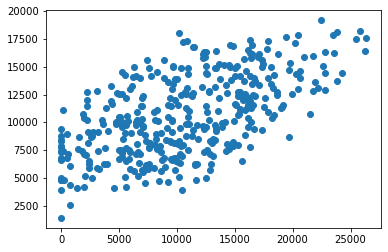

In [119]:
py.scatter(y,y_pred)

In [120]:
rsme_model=mean_squared_error(y,y_pred,squared=False)

In [121]:
rsme_model

4855.2944125963495

In [122]:
data['baseline prediction']=overall_average

In [123]:
data.head()

,Account Number,Annual Charges ($),Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?,baseline prediction
0,1260688,10230.19,42.4,3,3,15,24,1,0,10629.574631
1,3159700,18697.50,103.0,5,2,39,39,0,1,10629.574631
2,3977101,18149.15,84.4,7,2,37,25,1,0,10629.574631
3,16620929,8040.15,37.0,3,4,58,37,0,0,10629.574631
4,6504217,9695.48,109.7,5,3,0,39,0,0,10629.574631


In [126]:
baseline_predictions = [overall_average] * len(data)

In [129]:
baseline_predictions

[10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631043259,
 10629.574631

In [130]:
rmse_baseline = mean_squared_error(data['Annual Charges ($)'], baseline_predictions, squared=False)


In [131]:
 rmse_baseline

6034.325007018446

In [132]:
print("Overall Average Annual Charges:", overall_average)
print("RMSE (Baseline Model):", rmse_baseline)

Overall Average Annual Charges: 10629.574631043259
RMSE (Baseline Model): 6034.325007018446


In [133]:
# The RMSE measures the average difference between the true annual charges and the baseline predictions. 
# It provides a measure of how well the baseline model, which simply uses the overall average for all predictions, 
# performs in capturing the variability in the dependent variable. A lower RMSE indicates better model performance, 
# as it signifies smaller prediction errors. In this context, the RMSE of the baseline model can serve as a 
# reference point to evaluate the performance of more complex models that aim to improve upon this simple baseline.

#####  10) Using your “final” multiple regression model, create a forecast for each row of your data.
#### a. Calculate the RMSE and explain it, being sure to compare it to the baseline “average model”
#### from above.

In [139]:
data_final=data.drop(['Account Number','Annual Charges ($)','baseline prediction'],axis=1)

In [140]:
data_final.head(2)

,Annual Income ($1000),Household Size,Years of Post-High School Education,Hours Per Week Watching Television,Age,Gender,Exceeded Credit Limit in Past 12 Months?
0,42.4,3,3,15,24,1,0
1,103.0,5,2,39,39,0,1


In [143]:
X=data_final
y=data['Annual Charges ($)']


In [144]:
from sklearn.linear_model import LinearRegression
model_reg=LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [145]:
model_reg.fit(X_train,y_train)

LinearRegression()

In [146]:
predict=model_reg.predict(X_test)

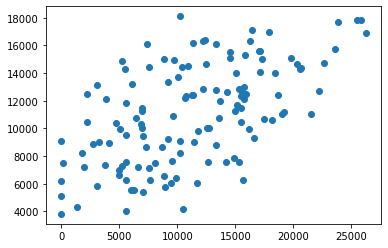

In [148]:
py.scatter(y_test,predict)

In [152]:
pd.DataFrame(predict)

,0
0,16934.474908
1,9087.025871
2,12457.365900
3,11495.829898
4,5789.752666
...,...
125,14109.338830
126,12102.676072
127,13111.108218
128,7493.440316


In [153]:
model_reg.fit(X,y)

LinearRegression()

In [154]:
pred_x=model_reg.predict(X)

In [157]:
pd.DataFrame(pred_x)

,0
0,7153.606955
1,16140.366476
2,14996.409572
3,5898.077225
4,14954.766223
...,...
388,10930.261140
389,7167.957515
390,7118.464522
391,13474.485102


In [161]:
data_final['Forecast']=pred_x

In [164]:
data_final[['Annual Income ($1000)','Forecast']]

,Annual Income ($1000),Forecast
0,42.4,7153.606955
1,103.0,16140.366476
2,84.4,14996.409572
3,37.0,5898.077225
4,109.7,14954.766223
...,...,...
388,70.3,10930.261140
389,15.4,7167.957515
390,31.4,7118.464522
391,73.8,13474.485102


In [165]:
# The code outputs the original 'Annual Charges ($)' values alongside the forecasted values. 
# Each row of the 'Forecast' column represents the predicted annual charges based on the features in that row, 
# according to the final multiple regression model.

In [166]:
# Calculate the RMSE for the final model
rmse_model_final = np.sqrt(mean_squared_error(y, y_pred))

In [167]:
print('rmse_model_final',rmse_model_final)

rmse_model_final 4855.2944125963495


In [170]:
# Calculate the RMSE for the baseline model (using overall average)
overall_average_final = np.mean(data['Annual Charges ($)'])
baseline_predictions_final = [overall_average_final] * len(data_final)
rmse_baseline_final = np.sqrt(mean_squared_error(y, baseline_predictions_final))

print("RMSE (Final Model):", rmse_model_final)
print("RMSE (Baseline Model):", rmse_baseline_final)

RMSE (Final Model): 4855.2944125963495
RMSE (Baseline Model): 6034.325007018446


In [171]:
# Comparing the RMSE of the final model to the RMSE of the baseline model allows us to assess how well 
# the final model performs compared to a simple model that predicts the overall average for all observations.
# A lower RMSE for the final model indicates better performance, 
# as it signifies smaller prediction errors compared to the baseline model.

#### If you could collect and utilize additional data for your multiple regression model, what would it be
#### and why?

## Ans

##### Credit History: Information about the customer's credit history, such as credit score, credit utilization,

##### Spending Habits: Data related to the customer's spending habits, such as the categories of expenses, frequency of purchases

##### Location: Geographic information, such as the customer's city, state, or region, 

##### Credit Limit: The credit limit assigned to each customer could be included as a variable. 

##### Employment Status and Income Stability: Information about the customer's employment status, job type, income stability.